### 🗂️ 데이터 구성
---
    1. tbl_factory.csv : 생산 공장 데이터
    2. tbl_warehouse.csv : 창고 데이터
    3. rel_cost.csv : 창고와 공장 간의 운송 비용
    4. tbl_transaction.csv : 2019년의 공장으로의 부품 운송 실적

In [2]:
import pandas as pd
factories = pd.read_csv('tbl_factory.csv', index_col=0)
factories.head()

FCName  FCDemand FCRegion
FCID                             
FC00001   서울공장        28       북부
FC00002   수원공장        29       북부
FC00003   인천공장        31       북부
FC00004   대전공장        25       북부
FC00005   대구공장        21       남부

In [6]:
warehouses = pd.read_csv('tbl_warehouse.csv', index_col=0)
cost = pd.read_csv('rel_cost.csv', index_col=0)
cost.head()

FCID     WHID  Cost
RCostID                        
1        FC00001  WH00001   0.4
2        FC00001  WH00002   0.8
3        FC00001  WH00003   1.5
4        FC00002  WH00001   0.9
5        FC00002  WH00002   0.8

In [4]:
trans = pd.read_csv('tbl_transaction.csv', index_col=0)
trans.head()

TransactionDate     ToFC   FromWH  Quantity
TRID                                                 
0     2019-01-01 02:11:10  FC00004  WH00003        33
1     2019-01-01 06:12:42  FC00007  WH00006        19
2     2019-01-01 06:32:32  FC00006  WH00004        31
3     2019-01-01 07:17:06  FC00002  WH00003        18
4     2019-01-01 07:52:18  FC00001  WH00002        30

In [7]:
merged_data = pd.merge(how='left',
                       left=cost,
                       right=trans,
                       left_on=['FCID', 'WHID'],
                       right_on=['ToFC', 'FromWH'])
merged_data

FCID     WHID  Cost      TransactionDate     ToFC   FromWH  Quantity
0     FC00001  WH00001   0.4  2019-01-02 11:04:17  FC00001  WH00001        38
1     FC00001  WH00001   0.4  2019-01-03 03:27:51  FC00001  WH00001        33
2     FC00001  WH00001   0.4  2019-01-05 09:47:50  FC00001  WH00001        24
3     FC00001  WH00001   0.4  2019-01-09 17:48:28  FC00001  WH00001        18
4     FC00001  WH00001   0.4  2019-01-09 20:31:53  FC00001  WH00001        12
...       ...      ...   ...                  ...      ...      ...       ...
3995  FC00008  WH00006   1.3  2019-12-22 11:27:54  FC00008  WH00006        22
3996  FC00008  WH00006   1.3  2019-12-26 12:45:17  FC00008  WH00006        26
3997  FC00008  WH00006   1.3  2019-12-27 03:04:18  FC00008  WH00006        35
3998  FC00008  WH00006   1.3  2019-12-28 02:32:34  FC00008  WH00006        14
3999  FC00008  WH00006   1.3  2019-12-29 05:59:08  FC00008  WH00006        26

[4000 rows x 7 columns]

In [8]:
merged_data = pd.merge(how='left',
                       left=merged_data,
                       right=factories,
                       on='FCID')
merged_data

FCID     WHID  Cost      TransactionDate     ToFC   FromWH  Quantity  \
0     FC00001  WH00001   0.4  2019-01-02 11:04:17  FC00001  WH00001        38   
1     FC00001  WH00001   0.4  2019-01-03 03:27:51  FC00001  WH00001        33   
2     FC00001  WH00001   0.4  2019-01-05 09:47:50  FC00001  WH00001        24   
3     FC00001  WH00001   0.4  2019-01-09 17:48:28  FC00001  WH00001        18   
4     FC00001  WH00001   0.4  2019-01-09 20:31:53  FC00001  WH00001        12   
...       ...      ...   ...                  ...      ...      ...       ...   
3995  FC00008  WH00006   1.3  2019-12-22 11:27:54  FC00008  WH00006        22   
3996  FC00008  WH00006   1.3  2019-12-26 12:45:17  FC00008  WH00006        26   
3997  FC00008  WH00006   1.3  2019-12-27 03:04:18  FC00008  WH00006        35   
3998  FC00008  WH00006   1.3  2019-12-28 02:32:34  FC00008  WH00006        14   
3999  FC00008  WH00006   1.3  2019-12-29 05:59:08  FC00008  WH00006        26   

     FCName  FCDemand FCRegion  
0      서울공장        28       북부  
1      서울공장        28       북부  
2      서울공장        28       북부  
3      서울공장        28       북부  
4      서울공장        28       북부  
...     ...       ...      ...  
3995   울산공장        16       남부  
3996   울산공장        16       남부  
3997   울산공장        16       남부  
3998   울산공장        16       남부  
3999   울산공장        16       남부  

[4000 rows x 10 columns]

In [10]:
merged_data = pd.merge(how='left',
                       left=merged_data,
                       right=warehouses,
                       on='WHID')
merged_data.head()

FCID     WHID  Cost      TransactionDate     ToFC   FromWH  Quantity  \
0  FC00001  WH00001   0.4  2019-01-02 11:04:17  FC00001  WH00001        38   
1  FC00001  WH00001   0.4  2019-01-03 03:27:51  FC00001  WH00001        33   
2  FC00001  WH00001   0.4  2019-01-05 09:47:50  FC00001  WH00001        24   
3  FC00001  WH00001   0.4  2019-01-09 17:48:28  FC00001  WH00001        18   
4  FC00001  WH00001   0.4  2019-01-09 20:31:53  FC00001  WH00001        12   

  FCName  FCDemand FCRegion WHName  WHSupply WHRegion  
0   서울공장        28       북부   판교창고        35       북부  
1   서울공장        28       북부   판교창고        35       북부  
2   서울공장        28       북부   판교창고        35       북부  
3   서울공장        28       북부   판교창고        35       북부  
4   서울공장        28       북부   판교창고        35       북부

In [11]:
merged_data = merged_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
merged_data.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
0  2019-01-02 11:04:17        38   0.4  FC00001   서울공장        28  WH00001   
1  2019-01-03 03:27:51        33   0.4  FC00001   서울공장        28  WH00001   
2  2019-01-05 09:47:50        24   0.4  FC00001   서울공장        28  WH00001   
3  2019-01-09 17:48:28        18   0.4  FC00001   서울공장        28  WH00001   
4  2019-01-09 20:31:53        12   0.4  FC00001   서울공장        28  WH00001   

  WHName  WHSupply WHRegion  
0   판교창고        35       북부  
1   판교창고        35       북부  
2   판교창고        35       북부  
3   판교창고        35       북부  
4   판교창고        35       북부

In [15]:
north = merged_data.loc[merged_data['WHRegion']=='북부']
north.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
0  2019-01-02 11:04:17        38   0.4  FC00001   서울공장        28  WH00001   
1  2019-01-03 03:27:51        33   0.4  FC00001   서울공장        28  WH00001   
2  2019-01-05 09:47:50        24   0.4  FC00001   서울공장        28  WH00001   
3  2019-01-09 17:48:28        18   0.4  FC00001   서울공장        28  WH00001   
4  2019-01-09 20:31:53        12   0.4  FC00001   서울공장        28  WH00001   

  WHName  WHSupply WHRegion  
0   판교창고        35       북부  
1   판교창고        35       북부  
2   판교창고        35       북부  
3   판교창고        35       북부  
4   판교창고        35       북부

In [16]:
south = merged_data.loc[merged_data['WHRegion']=='남부']
south.head()

TransactionDate  Quantity  Cost     ToFC FCName  FCDemand   FromWH  \
2000  2019-01-02 05:27:02        42   0.8  FC00005   대구공장        21  WH00004   
2001  2019-01-07 02:27:14        30   0.8  FC00005   대구공장        21  WH00004   
2002  2019-01-07 13:59:47        28   0.8  FC00005   대구공장        21  WH00004   
2003  2019-01-22 07:34:35        11   0.8  FC00005   대구공장        21  WH00004   
2004  2019-01-23 18:57:44        26   0.8  FC00005   대구공장        21  WH00004   

     WHName  WHSupply WHRegion  
2000   대전창고        60       남부  
2001   대전창고        60       남부  
2002   대전창고        60       남부  
2003   대전창고        60       남부  
2004   대전창고        60       남부

In [17]:
# 테크닉 52. 현재 운송량과 비용을 확인해 보자

In [21]:
print('북부지사 총비용 : {}'.format(north['Cost'].sum()))
print('남부지사 총비용 : {}'.format(south['Cost'].sum()))

북부지사 총비용 : 2189.3
남부지사 총비용 : 2062.0


In [22]:
print('북부지사의 총부품 운송개수 : {}'.format(north['Quantity'].sum()))
print('남부지사의 총부품 운송개수 : {}'.format(south['Quantity'].sum()))

북부지사의 총부품 운송개수 : 49146
남부지사의 총부품 운송개수 : 50214


In [27]:
print('북부지사의 부품 한개당 운송비용 : {}'.format(north['Cost'].sum()/north['Quantity'].sum()*10000))
print('남부지사의 부품 한개당 운송비용 : {}'.format(south['Cost'].sum()/south['Quantity'].sum()*10000))

북부지사의 부품 한개당 운송비용 : 445.46860375208564
남부지사의 부품 한개당 운송비용 : 410.6424503126618


In [31]:
cost_factories = pd.merge(how='left',
                          left=cost,
                          right=factories,
                          on='FCID')
cost_factories.head()

FCID     WHID  Cost FCName  FCDemand FCRegion
0  FC00001  WH00001   0.4   서울공장        28       북부
1  FC00001  WH00002   0.8   서울공장        28       북부
2  FC00001  WH00003   1.5   서울공장        28       북부
3  FC00002  WH00001   0.9   수원공장        29       북부
4  FC00002  WH00002   0.8   수원공장        29       북부

In [33]:
print('북부지사의 평균 운송 비용 : {}'.format(cost_factories.loc[cost_factories['FCRegion']=='북부', 'Cost'].mean()))
print('남부지사의 평균 운송 비용 : {}'.format(cost_factories.loc[cost_factories['FCRegion']=='남부', 'Cost'].mean()))

북부지사의 평균 운송 비용 : 1.075
남부지사의 평균 운송 비용 : 1.05


In [34]:
# 테크닉 53. 네트워크를 가시화해보자

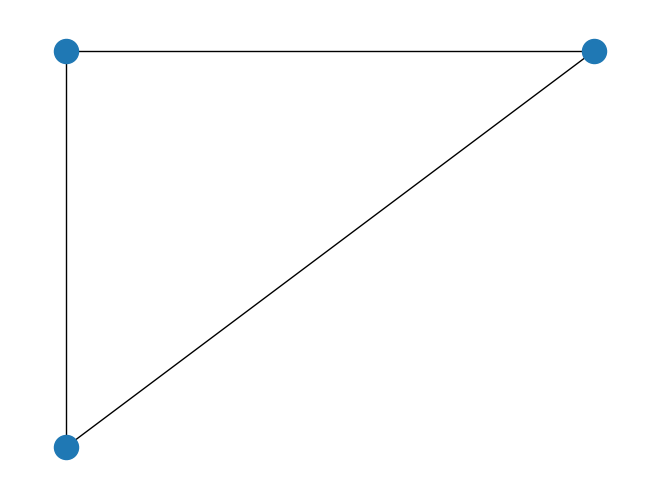

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

pos = {}
pos['nodeA'] = (0, 0)
pos['nodeB'] = (1, 1)
pos['nodeC'] = (0, 1)

nx.draw(G, pos)
plt.show()

In [39]:
# 테크닉 54. 네트워크에 노드를 추가해보자

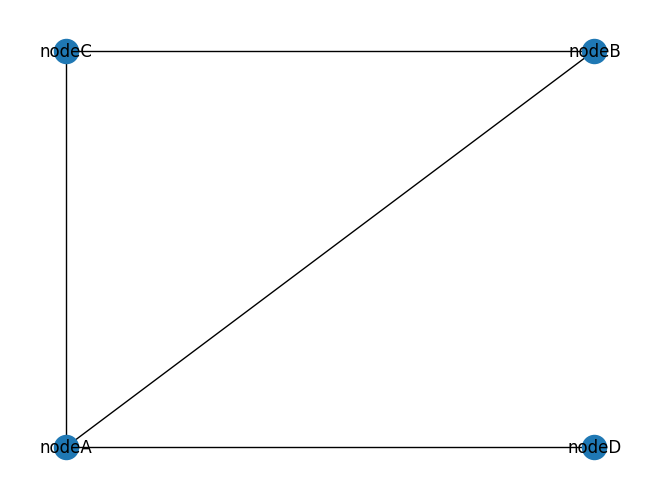

In [41]:
G.add_node('nodeD')
G.add_edge('nodeA', 'nodeD')
pos['nodeD'] = (1, 0)
nx.draw(G, pos, with_labels=True)
plt.show()

In [42]:
# 테크닉 55. 경로에 가중치를 부여하자

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_13708/2724820753.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edge_weights.append(df_w.iloc[i][j]*size)


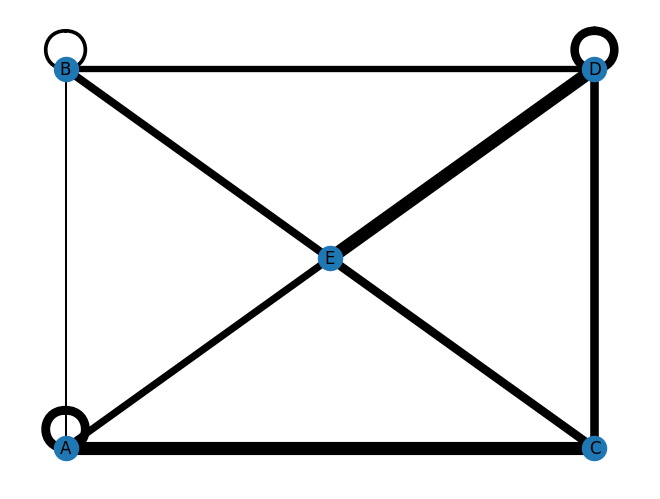

In [54]:
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
G = nx.Graph()
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

nx.draw(G, pos, with_labels=True, width=edge_weights)

In [55]:
# 테크닉 56. 운송 경로 정보를 불러오자

### 🗂️ 데이터 구성
---
    1. trans_rotue.csv : 운송 경로
    2. trans_route_pos : 창고 및 공장의 위치정보
    3. trans_cost.csv : 창고와 공장 간의 운송 비용
    4. demand.csv : 공장의 제품 생산량에 대한 수요
    5. supply.csv : 창고가 공급 가능한 최대 부품수
    6. trans_route_new.csv : 새로 설계한 운송 경로

In [56]:
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
df_tr.head()

F1  F2  F3  F4
공장                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15

In [57]:
# 테크닉 57. 운송 경로 정보를 네트워크로 가시화해보자

In [59]:
df_pos = pd.read_csv('trans_route_pos.csv')
df_pos.head()

W1  W2  W3   F1   F2   F3   F4
0   0   0   0  4.0  4.0  4.0  4.0
1   1   2   3  0.5  1.5  2.5  3.5

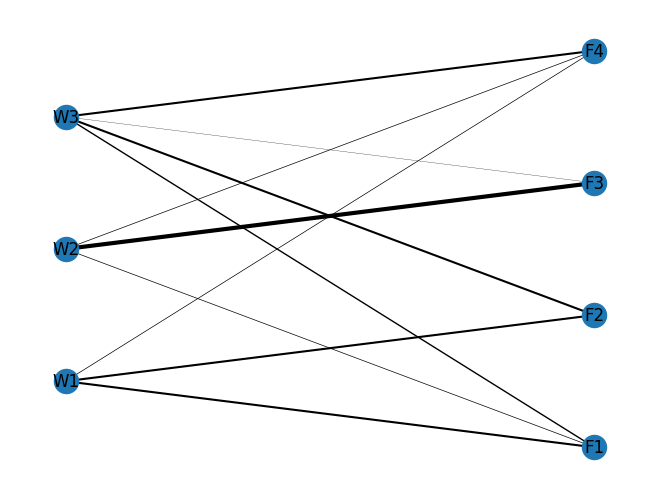

In [60]:
G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
        if num_pre<len(G.edges):
            num_pre = len(G.edges)
            weight = 0
            if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                    weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
            elif (df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                    weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
            edge_weights.append(weight)

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

nx.draw(G, pos, with_labels=True, width=edge_weights)
plt.show()

In [61]:
# 테크닉 58. 운송 비용 함수를 작성하자

In [63]:
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
df_tc = pd.read_csv('trans_cost.csv', index_col='공장')

def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print('총 운송 비용 : ' + str(trans_cost(df_tr, df_tc)))

총 운송 비용 : 1493


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_13708/1603761702.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
